In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# May 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Average side length of a k-neighborhood

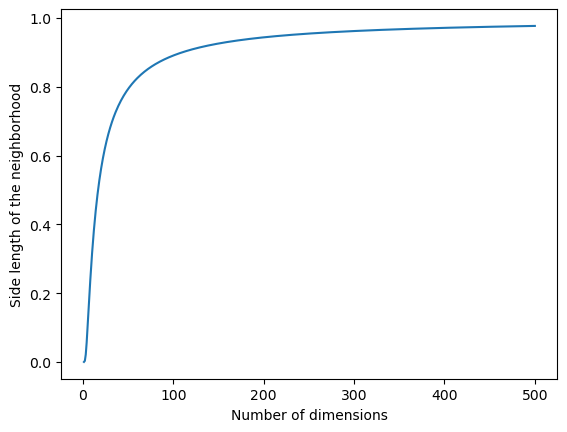

In [3]:
k = 10
n = 10**6
d = np.arange(1, 501)
l = (k/n)**(1/d)

plt.plot(d, l)
plt.xlabel('Number of dimensions')
plt.ylabel('Side length of the neighborhood')

plt.savefig('figures/average_neighborhood_length.pdf')

In [4]:
l[2], l[-1]

(0.021544346900318843, 0.9772372209558107)

MNIST Example

In [5]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = X / 255

train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
print(f'Training accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Training accuracy: 0.9819
Test accuracy: 0.9688


In [8]:
import time

start = time.time()
clf.predict(X_test)
print(f'Prediction time: {time.time() - start:.4f} seconds')

Prediction time: 6.0548 seconds


Dimensionality Reduction using PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
clf.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [10]:
print(f'Training accuracy: {clf.score(X_train_reduced, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test_reduced, y_test):.4f}')

Training accuracy: 0.9859
Test accuracy: 0.9748


In [11]:
start = time.time()

X_test_reduced = pca.transform(X_test)
clf.predict(X_test_reduced)
print(f'Prediction time (with PCA): {time.time() - start:.4f} seconds')

Prediction time (with PCA): 1.0917 seconds


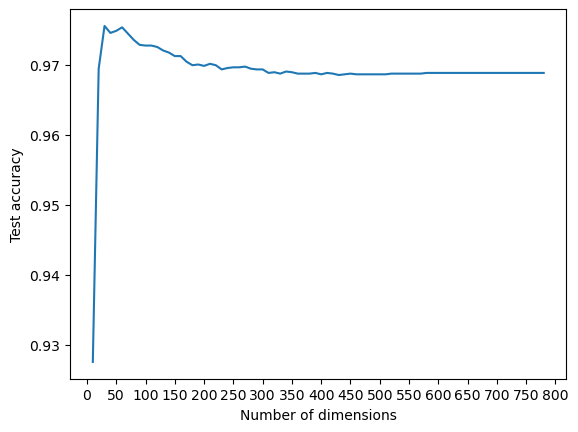

In [14]:
n_components_range = range(10, 785, 10)
test_accuracies = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    clf.fit(X_train_reduced, y_train)
    accuracy = clf.score(X_test_reduced, y_test)
    test_accuracies.append(accuracy)
    
plt.plot(n_components_range, test_accuracies)
plt.xlabel('Number of dimensions')
plt.ylabel('Test accuracy')
plt.xticks(range(0, 801, 50))

plt.savefig('figures/mnist_dimensionality_reduction.pdf')